In [2]:
import pandas as pd
import numpy as np

## 1 Concat & Merge

Concat (concatenate) berfungsi untuk menggabungkan 2 series atau data frame

In [ ]:
s1=pd.Series(['a','b','c'])
s2=pd.Series(['x','y','z'])

In [ ]:
pd.concat([s1,s2]) #indexnya mengikuti s1 dan s2

0    a
1    b
2    c
0    x
1    y
2    z
dtype: object

In [ ]:
pd.concat([s1,s2],ignore_index=True) #indexnya tidak mengikuti gabungan s1 dan s2

0    a
1    b
2    c
3    x
4    y
5    z
dtype: object

In [ ]:
pd.concat([s1,s2],keys=['s1','s2']) #nambahin level di depannya

s1  0    a
    1    b
    2    c
s2  0    x
    1    y
    2    z
dtype: object

In [ ]:
pd.concat([s1,s2],keys=['s1','s2'],names=['nama series', 'index'])

nama series  index
s1           0        a
             1        b
             2        c
s2           0        x
             1        y
             2        z
dtype: object

In [3]:
df1=pd.DataFrame({'col 1':['a','b','c'],'col 2':[0,1,2]})
df2=pd.DataFrame({'col 1':['x','y','z'],'col 2':[4,5,6]})

In [4]:
pd.concat([df1,df2])  #default axis=0

,col 1,col 2
0,a,0
1,b,1
2,c,2
0,x,4
1,y,5
2,z,6


In [ ]:
pd.concat([df1,df2], axis=1)

,col 1,col 2,col 1,col 2
0,a,0,x,4
1,b,1,y,5
2,c,2,z,6


In [ ]:
df3=pd.DataFrame({'col 3':['m','n','0'],'col 4':[40,50,60]})

In [ ]:
pd.concat([df1,df3])

,col 1,col 2,col 3,col 4
0,a,0.0,NaN,NaN
1,b,1.0,NaN,NaN
2,c,2.0,NaN,NaN
0,NaN,NaN,m,40.0
1,NaN,NaN,n,50.0
2,NaN,NaN,0,60.0


In [ ]:
df4=pd.DataFrame({'col 2':[40,50,60], 'col 3':['m','n','0'],})
df4

,col 2,col 3
0,40,m
1,50,n
2,60,0


In [ ]:
pd.concat([df1,df4],join='inner') #gabung hanya kolom yang beririsan

,col 2
0,0
1,1
2,2
0,40
1,50
2,60


In [ ]:
menu1 = pd.DataFrame({"makanan": ["ayam", "sapi"], "harga1": [10000, 20000]})
menu2 = pd.DataFrame({"makanan": ["ayam", "sapi"], "harga2": [40000, 50000]})

pd.merge(menu1,menu2,on='makanan')

,makanan,harga1,harga2
0,ayam,10000,40000
1,sapi,20000,50000


In [ ]:
menu3 = pd.DataFrame({"makanan": ["ayam", "ayam"], "harga3": [20000, 25000]})
menu4 = pd.DataFrame({"makanan": ["ayam", "ayam"], "harga4": [50000, 65000]})
pd.merge(menu3,menu4,on='makanan')

,makanan,harga3,harga4
0,ayam,20000,50000
1,ayam,20000,65000
2,ayam,25000,50000
3,ayam,25000,65000


## 2. Operations

## 2.1 to numpy

In [ ]:
s1

0    a
1    b
2    c
dtype: object

In [ ]:
s1.to_numpy

<bound method IndexOpsMixin.to_numpy of 0    a
1    b
2    c
dtype: object>

In [ ]:
df1=pd.DataFrame(np.random.randint(0,999,size=(4,6)),columns=['Gula','Tepung','Beras','Garem','Lada','Kecap'])
df1

,Gula,Tepung,Beras,Garem,Lada,Kecap
0,492,879,589,461,810,1
1,325,462,793,43,818,420
2,651,358,260,967,261,121
3,51,749,554,334,380,381


In [ ]:
df1.to_numpy

<bound method DataFrame.to_numpy of    Gula  Tepung  Beras  Garem  Lada  Kecap
0   762     290    857    625    24    273
1   557     813    130     22   923     40
2   196     260    573    769   916    642
3   768     399    135    522   190    104>

## 2.2 Sorting

In [ ]:
df1.sort_index(axis=1) #urutin berdasarkan nama kolom

,Beras,Garem,Gula,Kecap,Lada,Tepung
0,589,461,492,1,810,879
1,793,43,325,420,818,462
2,260,967,651,121,261,358
3,554,334,51,381,380,749


In [ ]:
df1.sort_index(axis=1,ascending=False) #urutannya descending

,Tepung,Lada,Kecap,Gula,Garem,Beras
0,879,810,1,492,461,589
1,462,818,420,325,43,793
2,358,261,121,651,967,260
3,749,380,381,51,334,554


In [ ]:
df1.sort_values(by='Gula') #diurutin berdasarkan value 'Gula'

,Gula,Tepung,Beras,Garem,Lada,Kecap
3,51,749,554,334,380,381
1,325,462,793,43,818,420
0,492,879,589,461,810,1
2,651,358,260,967,261,121


## 2.3 Operasi pada dataset

In [ ]:
df1['Gula']+df1['Tepung'] #jumlahin gula dan tepung

0    1371
1     787
2    1009
3     800
dtype: int64

In [ ]:
df1['Gula dan Tepung']=df1['Gula']+df1['Tepung'] #hasilnya dimasukin ke kolom baru
df1

,Gula,Tepung,Beras,Garem,Lada,Kecap,Gula dan Tepung
0,492,879,589,461,810,1,1371
1,325,462,793,43,818,420,787
2,651,358,260,967,261,121,1009
3,51,749,554,334,380,381,800


In [ ]:
a1 #operasinya dilakukan pada baris

Gula                817
Tepung             1341
Beras              1382
Garem               504
Lada               1628
Kecap               421
Gula dan Tepung    2158
dtype: int64

## 2.4 Apply

In [ ]:
df1.apply(np.cumsum) #melakukan operasi cummulated sum untuk setiap kolom

,Gula,Tepung,Beras,Garem,Lada,Kecap,Gula dan Tepung
0,762,290,857,625,24,273,1052
1,1319,1103,987,647,947,313,2422
2,1515,1363,1560,1416,1863,955,2878
3,2283,1762,1695,1938,2053,1059,4045


In [ ]:
df1.apply(lambda x: x.max()-x.min()) #Dapat dikombinasikan dengan fungsi lambda

Gula               572
Tepung             553
Beras              727
Garem              747
Lada               899
Kecap              602
Gula dan Tepung    914
dtype: int64

In [ ]:
df1.apply(lambda x: x[0]*x[1])

Gula                424434
Tepung              235770
Beras               111410
Garem                13750
Lada                 22152
Kecap                10920
Gula dan Tepung    1441240
dtype: int64

In [ ]:
def pajak(x):    #define a function
  return 1.1*x   #pajak 10 persen

In [ ]:
df1['KecapPPN'] = df1['Kecap'].apply(lambda x: int(pajak(x)))
df1

,Gula,Tepung,Beras,Garem,Lada,Kecap,KecapPPN
0,742,640,199,793,891,489,537
1,351,321,921,365,310,640,704
2,90,726,160,439,474,260,286
3,343,407,51,386,326,84,92


## 3. Missing Values & Duplicates

In [ ]:
df = pd.DataFrame({"Evan" : [np.nan,100,95,94,99],"Boy" : [100,np.nan,95,99,94],"Maxwell" : [95,100,99,np.nan,94]})
df #berikut adalah dataframe, dapat terlihat missing values di representasikan sebagai NAN

,Evan,Boy,Maxwell
0,NaN,100.0,95.0
1,100.0,NaN,100.0
2,95.0,95.0,99.0
3,94.0,99.0,NaN
4,99.0,94.0,94.0


In [ ]:
df.isna() #menampilkan lokasi dari data yang missing, direpresentasikan sebagai true

,Evan,Boy,Maxwell
0,True,False,False
1,False,True,False
2,False,False,False
3,False,False,True
4,False,False,False


In [ ]:
df.isnull() #dengan isnull juga bisa

,Evan,Boy,Maxwell
0,True,False,False
1,False,True,False
2,False,False,False
3,False,False,True
4,False,False,False


In [ ]:
df.isna().sum()    #jumlah value yg missing

Evan       1
Boy        1
Maxwell    1
dtype: int64

In [ ]:
df.fillna(0) #menggantikan missing value dengan nilai "0"

,Evan,Boy,Maxwell
0,0.0,100.0,95.0
1,100.0,0.0,100.0
2,95.0,95.0,99.0
3,94.0,99.0,0.0
4,99.0,94.0,94.0


In [ ]:
df.dropna() #menghapus baris yang mengandung "NAN"

,Evan,Boy,Maxwell
2,95.0,95.0,99.0
4,99.0,94.0,94.0


## 4. String Operations

In [ ]:
list_nama = pd.Series(["Evan Eka Wijaya","Maxwell Thomson","Raden Fadil Aji Saputra"])
list_nama

0            Evan Eka Wijaya
1            Maxwell Thomson
2    Raden Fadil Aji Saputra
dtype: object

In [ ]:
lowercase = list_nama.str.lower() #mengubah semua anggota pada series menjadi huruf kecil
lowercase

0            evan eka wijaya
1            maxwell thomson
2    raden fadil aji saputra
dtype: object

In [ ]:
uppercase = list_nama.str.upper() #mengubah semua anggota pada series menjadi kapital
uppercase

0            EVAN EKA WIJAYA
1            MAXWELL THOMSON
2    RADEN FADIL AJI SAPUTRA
dtype: object

In [ ]:
list_nama2 = pd.Series(["     Evan","Boy    "]) #menghapuskan space di awal dan di akhir kata
strip = list_nama2.str.strip()
strip

0    Evan
1     Boy
dtype: object

In [ ]:
split = list_nama.str.split(" ") #memisahkan setiap kata pada series dengan tanda baca tertentu (contoh " ")
#dalam case ini setiap kata dipisahkan oleh space
split

0             [Evan, Eka, Wijaya]
1              [Maxwell, Thomson]
2    [Raden, Fadil, Aji, Saputra]
dtype: object

In [ ]:
cat = list_nama.str.cat(sep=" ") #gabungkan setiap anggota pada series dengan pemisah space (" ")
cat

'Evan Eka Wijaya Maxwell Thomson Raden Fadil Aji Saputra'

## 5. count values, max, min




In [ ]:
angka = pd.Series([1,2,3,4,3,5,4])

In [ ]:
angka.value_counts() #menghitung jumlah dari setiap komponen pada series, dapat terlihat terdapat 2 angka 4 dan 2 angka 3,dan sisanya 1

4    2
3    2
5    1
2    1
1    1
dtype: int64

In [ ]:
angka.value_counts(normalize=True) #mengembalikan banyaknya anggota dalam desimal

4    0.285714
3    0.285714
5    0.142857
2    0.142857
1    0.142857
dtype: float64

In [ ]:
angka.value_counts(bins=3) #membagi data menjadi 3 interval dan menghitung banyaknya anggota yang termasuk di interval 

(3.667, 5.0]      3
(2.333, 3.667]    2
(0.995, 2.333]    2
dtype: int64

In [ ]:
frame = pd.DataFrame({"Evan" : [90,92,95,98],
                      "Maxwell" : [91,91,89,99],
                     "Boy" : [91,93,100,85]})
frame

,Evan,Maxwell,Boy
0,90,91,91
1,92,91,93
2,95,89,100
3,98,99,85


In [ ]:
frame.count()

Evan       4
Maxwell    4
Boy        4
dtype: int64

In [ ]:
frame.count(axis=1)

0    3
1    3
2    3
3    3
dtype: int64

In [ ]:
frame.value_counts()

Evan  Maxwell  Boy
98    99       85     1
95    89       100    1
92    91       93     1
90    91       91     1
dtype: int64

In [ ]:
frame.max() #mengembalikan nilai max dari masing masing kolom

Evan        98
Maxwell     99
Boy        100
dtype: int64

In [ ]:
frame.min() #mengembalikan nilai min dari masing masing kolom

Evan       90
Maxwell    89
Boy        85
dtype: int64

In [ ]:
frame.mean() #mengembalikan nilai rata rata dari masing masing kolom

Evan       93.75
Maxwell    92.50
Boy        92.25
dtype: float64

## 6. Aggregation Functions

In [ ]:
path = '/content/dkikepadatankelurahan2013.csv' #jangan lupa nama file.csv nya
dki = pd.read_csv(path,sep=';')

In [ ]:
dki.describe() #ringkasan dataframe

,TAHUN,KEPADATAN (JIWA/KM2),35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,40-44 Perempuan,45-49 Laki-Laki,45-49 Perempuan,50-54 Laki-Laki,50-54 Perempuan,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan
count,267.0,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,2013.0,21974.071161,2264.157303,1740.528090,1675.644195,2331.595506,1643.711610,1577.382022,2259.314607,1336.093633,1178.636704,1867.224719,981.749064,876.659176,1403.288390,683.599251,607.011236,1083.262172,484.599251,480.269663
std,0.0,15797.276753,1740.545141,1057.289862,1014.907306,2051.114031,1158.863977,1137.243632,2540.761587,1023.421706,971.187785,2207.402928,924.674729,839.510133,1960.793725,758.463034,714.717419,1574.043884,607.659884,583.769313
min,2013.0,628.000000,84.000000,75.000000,73.000000,80.000000,66.000000,62.000000,34.000000,29.000000,30.000000,32.000000,22.000000,13.000000,12.000000,14.000000,10.000000,5.000000,5.000000,7.000000
25%,2013.0,11734.000000,1186.000000,1062.000000,1023.000000,1084.000000,957.500000,886.000000,790.000000,712.500000,595.500000,557.000000,419.500000,366.000000,253.000000,215.500000,170.000000,145.000000,116.500000,121.500000
50%,2013.0,17304.000000,1880.000000,1631.000000,1576.000000,1714.000000,1404.000000,1315.000000,1216.000000,1107.000000,909.000000,889.000000,650.000000,587.000000,413.000000,354.000000,285.000000,260.000000,200.000000,204.000000
75%,2013.0,29226.000000,2768.500000,2213.000000,2112.500000,2781.500000,1949.000000,1867.000000,2623.500000,1671.500000,1405.500000,2342.000000,1186.500000,1052.500000,2097.500000,928.500000,836.500000,1784.000000,716.000000,675.500000
max,2013.0,94166.000000,13011.000000,7488.000000,7243.000000,14731.000000,8822.000000,8352.000000,17174.000000,7480.000000,6846.000000,14326.000000,6333.000000,5476.000000,11809.000000,4758.000000,4475.000000,9233.000000,3959.000000,3526.000000


In [ ]:
dki.mean()

TAHUN                    2013.000000
KEPADATAN (JIWA/KM2)    21974.071161
35-39 Laki-Laki          2264.157303
35-39 Perempuan          1740.528090
40-44 Laki-Laki          1675.644195
40-44 Perempuan          2331.595506
45-49 Laki-Laki          1643.711610
45-49 Perempuan          1577.382022
50-54 Laki-Laki          2259.314607
50-54 Perempuan          1336.093633
55-59 Laki-Laki          1178.636704
55-59 Perempuan          1867.224719
60-64 Laki-Laki           981.749064
60-64 Perempuan           876.659176
65-69 Laki-Laki          1403.288390
65-69 Perempuan           683.599251
70-74 Laki-Laki           607.011236
70-74 Perempuan          1083.262172
>75 Laki-Laki             484.599251
>75  Perempuan            480.269663
dtype: float64

In [ ]:
dki.median()

TAHUN                    2013.0
KEPADATAN (JIWA/KM2)    17304.0
35-39 Laki-Laki          1880.0
35-39 Perempuan          1631.0
40-44 Laki-Laki          1576.0
40-44 Perempuan          1714.0
45-49 Laki-Laki          1404.0
45-49 Perempuan          1315.0
50-54 Laki-Laki          1216.0
50-54 Perempuan          1107.0
55-59 Laki-Laki           909.0
55-59 Perempuan           889.0
60-64 Laki-Laki           650.0
60-64 Perempuan           587.0
65-69 Laki-Laki           413.0
65-69 Perempuan           354.0
70-74 Laki-Laki           285.0
70-74 Perempuan           260.0
>75 Laki-Laki             200.0
>75  Perempuan            204.0
dtype: float64

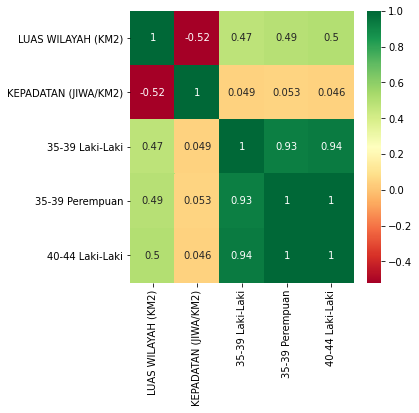

In [ ]:
##BONUS
#correlation antar feature + heatmap
import seaborn as sns
import matplotlib.pyplot as plt

hmat = dki.select_dtypes(exclude='object').corr()
top_corr_features = hmat.index[1:6]     #5 features saja
plt.figure(figsize=(5,5))
sns.heatmap(dki[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
dki.TAHUN.unique()

array([2013])

## 7. Grouping & Pivot Table

In [ ]:
np.random.seed(123)

jumlah_ternak = pd.DataFrame({
    "binatang": ["ayam", "bebek", "bebek", "ayam", "ayam", "bebek", "ayam", "ayam"],
    "warna": ["kuning", "kuning", "coklat", "merah", "coklat", "coklat", "merah", "kuning"], 
    "jumlah 1": np.random.randint(1,999,8),
    "jumlah 2": np.random.randint(1,999,8)})

In [ ]:
jumlah_ternak

,binatang,warna,jumlah 1,jumlah 2
0,ayam,kuning,511,596
1,bebek,kuning,366,107
2,bebek,coklat,383,124
3,ayam,merah,323,570
4,ayam,coklat,989,215
5,bebek,coklat,99,738
6,ayam,merah,743,97
7,ayam,kuning,18,114


In [ ]:
jumlah_ternak.groupby('binatang').sum() #jumlahnya berdasarkan nama binatang

,jumlah 1,jumlah 2
binatang,,
ayam,2584,1592
bebek,848,969


In [ ]:
jumlah_ternak.groupby(['binatang','warna']).sum() #jumlahnya berdasarkan nama binatang

jumlah 1  jumlah 2
binatang warna                     
ayam     coklat       989       215
         kuning       529       710
         merah       1066       667
bebek    coklat       482       862
         kuning       366       107

In [ ]:
jumlah_ternak.groupby('binatang')['jumlah 1'].sum()   #Jumlah 1 berdasarkan binatang, dalam btk series

binatang
ayam     2584
bebek     848
Name: jumlah 1, dtype: int64

In [ ]:
jumlah_ternak.groupby('binatang')['jumlah 1'].sum().reset_index()   #Jumlah 1 berdasarkan binatang, dalam btk dataframe

,binatang,jumlah 1
0,ayam,2584
1,bebek,848


In [ ]:
#jumlah kombinasi antara binatang dan warna
stay = jumlah_ternak.groupby(['binatang','warna'])['jumlah 1'].count().reset_index() #reset_index biar dataframe
stay.rename(columns={'jumlah 1':'count'}, inplace=True)    #ganti nama
stay.head()

,binatang,warna,count
0,ayam,coklat,1
1,ayam,kuning,2
2,ayam,merah,2
3,bebek,coklat,2
4,bebek,kuning,1


In [ ]:
#atau bisa juga
stay = jumlah_ternak.groupby(['binatang','warna']).agg('count').reset_index()  #reset_index biar dataframe
stay = stay.iloc[:,0:3]   #ingin 3 kolom pertama saja
stay.rename(columns={'jumlah 1':'count'}, inplace=True)    #ganti nama
stay.head()

,binatang,warna,count
0,ayam,coklat,1
1,ayam,kuning,2
2,ayam,merah,2
3,bebek,coklat,2
4,bebek,kuning,1


In [ ]:
pd.pivot_table(jumlah_ternak,values='jumlah 1',index=['binatang'],columns=['warna'])

warna,coklat,kuning,merah
binatang,,,
ayam,989.0,264.5,533.0
bebek,241.0,366.0,NaN


## Latihan Soal

In [ ]:
dki = pd.read_csv('https://raw.githubusercontent.com/maxwelth/ntar-dihapus/main/dkikepadatankelurahan2013.csv')
dki.dropna(axis=1,inplace=True)

##### 1. Kabupaten/Kota mana yang memiliki jumlah penduduk terbesar untuk umur 35-39? Tampilkan dalam bentuk dataframe (Urutkan terbesar hingga terkecil)

In [ ]:
dki.groupby('NAMA KABUPATEN/KOTA')['35-39 Laki-Laki'].sum()

NAMA KABUPATEN/KOTA
JAKARTA BARAT         181626
JAKARTA PUSAT          50256
JAKARTA SELATAN       100867
JAKARTA TIMUR         135669
JAKARTA UTARA         135132
KAB.ADM.KEP.SERIBU       980
Name: 35-39 Laki-Laki, dtype: int64

In [ ]:
dki.groupby('NAMA KABUPATEN/KOTA')['35-39 Perempuan'].sum()

NAMA KABUPATEN/KOTA
JAKARTA BARAT         106863
JAKARTA PUSAT          47836
JAKARTA SELATAN        98432
JAKARTA TIMUR         130196
JAKARTA UTARA          80461
KAB.ADM.KEP.SERIBU       933
Name: 35-39 Perempuan, dtype: int64

In [ ]:
lakilaki1 = dki.groupby('NAMA KABUPATEN/KOTA')['35-39 Laki-Laki'].sum()
perempuan1 = dki.groupby('NAMA KABUPATEN/KOTA')['35-39 Perempuan'].sum()

In [ ]:
gabungan1 = (lakilaki1 + perempuan1).reset_index()
gabungan1

,NAMA KABUPATEN/KOTA,0
0,JAKARTA BARAT,288489
1,JAKARTA PUSAT,98092
2,JAKARTA SELATAN,199299
3,JAKARTA TIMUR,265865
4,JAKARTA UTARA,215593
5,KAB.ADM.KEP.SERIBU,1913


In [ ]:
gabungan1.columns = ['Kabupaten', 'Jumlah Penduduk 35-39']
gabungan1 = gabungan1.sort_values(by=['Jumlah Penduduk 35-39'], ascending=False)
gabungan1

,Kabupaten,Jumlah Penduduk 35-39
0,JAKARTA BARAT,288489
3,JAKARTA TIMUR,265865
4,JAKARTA UTARA,215593
2,JAKARTA SELATAN,199299
1,JAKARTA PUSAT,98092
5,KAB.ADM.KEP.SERIBU,1913


##### 2. Kabupaten/Kota mana yang memiliki jumlah penduduk terbesar (segala umur)? Tampilkan dalam bentuk dataframe (Urutkan terbesar hingga terkecil)

In [ ]:
namakolom = dki.columns.drop(['TAHUN', 'NAMA PROVINSI', 'NAMA KABUPATEN/KOTA', 'NAMA KECAMATAN',
       'NAMA KELURAHAN', 'LUAS WILAYAH (KM2)', 'KEPADATAN (JIWA/KM2)']) #sisakan hanya kolom dengan jumlah penduduk

In [ ]:
namakolom

Index(['35-39 Laki-Laki', '35-39 Perempuan', '40-44 Laki-Laki',
       '40-44 Perempuan', '45-49 Laki-Laki', '45-49 Perempuan',
       '50-54 Laki-Laki', '50-54 Perempuan', '55-59 Laki-Laki',
       '55-59 Perempuan', '60-64 Laki-Laki', '60-64 Perempuan',
       '65-69 Laki-Laki', '65-69 Perempuan', '70-74 Laki-Laki',
       '70-74 Perempuan', '>75 Laki-Laki', '>75  Perempuan'],
      dtype='object')

In [ ]:
b=0
for i in namakolom:
  a = dki.groupby('NAMA KABUPATEN/KOTA')[i].sum()
  b = a+b

In [ ]:
b

NAMA KABUPATEN/KOTA
JAKARTA BARAT         2316181
JAKARTA PUSAT          500056
JAKARTA SELATAN        878137
JAKARTA TIMUR         1136447
JAKARTA UTARA         1695623
KAB.ADM.KEP.SERIBU       8308
dtype: int64

In [ ]:
gabungan2 = b.reset_index()  #ke dataframe
gabungan2.columns = ['Kabupaten', 'Jumlah Penduduk']  #memberi nama pada kolom
gabungan2 = gabungan2.sort_values(by=['Jumlah Penduduk'], ascending=False)
gabungan2

,Kabupaten,Jumlah Penduduk
0,JAKARTA BARAT,2316181
4,JAKARTA UTARA,1695623
3,JAKARTA TIMUR,1136447
2,JAKARTA SELATAN,878137
1,JAKARTA PUSAT,500056
5,KAB.ADM.KEP.SERIBU,8308


#### 3. Jika 'Rasio Kepadatan' didefinisikan sebagai 'Jumlah Penduduk' / 'Luas Wilayah (km2)'. Berdasarkan dataset yang diberikan, tentukan Kabupaten/Kota yang memiliki 'Rasio Kepadatan' tertinggi

Jawab :
###### Idenya adalah kita ingin melakukan groupby pada 'Jumlah Penduduk' dan 'Luas Wilayah' berdasarkan Kabupaten/Kota yang ada. Setelah itu, buat sebuah kolom baru yang hasilnya diperoleh dari pembagian 'Jumlah Penduduk' dengan 'Luas Wilayah'.

##### Hasil groupby 'Jumlah Penduduk' berdasarkan Kabupaten akan menggunakan data hasil groupby dari no 2 (lanjutan)

In [ ]:
# Groupby luas wilayah berdasarkan kabupaten/kota
dki.groupby('NAMA KABUPATEN/KOTA')['LUAS WILAYAH (KM2)'].sum().reset_index()  #preview

,NAMA KABUPATEN/KOTA,LUAS WILAYAH (KM2)
0,JAKARTA BARAT,127.11
1,JAKARTA PUSAT,48.08
2,JAKARTA SELATAN,145.73
3,JAKARTA TIMUR,188.19
4,JAKARTA UTARA,143.21
5,KAB.ADM.KEP.SERIBU,11.81


In [ ]:
luwas = dki.groupby('NAMA KABUPATEN/KOTA')['LUAS WILAYAH (KM2)'].sum().reset_index()  #Store to a variable
luwas

,NAMA KABUPATEN/KOTA,LUAS WILAYAH (KM2)
0,JAKARTA BARAT,127.11
1,JAKARTA PUSAT,48.08
2,JAKARTA SELATAN,145.73
3,JAKARTA TIMUR,188.19
4,JAKARTA UTARA,143.21
5,KAB.ADM.KEP.SERIBU,11.81


##### Karena pada data gabungan2, nama kolom untuk masing-masing kabupaten adalah 'Kabupaten', maka kolom untuk data 'luwas' juga akan direname sebagai 'Kabupaten' (agar nanti mempermudah merge)

In [ ]:
luwas.rename(columns={'NAMA KABUPATEN/KOTA':'Kabupaten'}, inplace=True) #disamakan dg nama kolom 'gabungan2' agar dapat di merge
luwas

,Kabupaten,LUAS WILAYAH (KM2)
0,JAKARTA BARAT,127.11
1,JAKARTA PUSAT,48.08
2,JAKARTA SELATAN,145.73
3,JAKARTA TIMUR,188.19
4,JAKARTA UTARA,143.21
5,KAB.ADM.KEP.SERIBU,11.81


#####  Data hasil pengelompokkan dari 'Luas Wilayah' dan 'Jumlah Penduduk'. Sekarang tinggal dilakukan merge dengan 'Kabupaten' sebagai acuan.

In [ ]:
gabungan3 = pd.merge(luwas,gabungan2, on='Kabupaten')
gabungan3

,Kabupaten,LUAS WILAYAH (KM2),Jumlah Penduduk
0,JAKARTA BARAT,127.11,2316181
1,JAKARTA PUSAT,48.08,500056
2,JAKARTA SELATAN,145.73,878137
3,JAKARTA TIMUR,188.19,1136447
4,JAKARTA UTARA,143.21,1695623
5,KAB.ADM.KEP.SERIBU,11.81,8308


##### Karena 'Rasio Kepadatan' didefinisikan sebagai 'Jumlah Penduduk' / 'Luas Wilayah (km2)' berdasarkan premis soal. Mari kita membuat sebuah kolom baru yang berisi 'Jumlah Penduduk' / 'Luas Wilayah (km2)'

In [ ]:
gabungan3['rasio_kepadatan'] = gabungan3['Jumlah Penduduk']/gabungan3['LUAS WILAYAH (KM2)']
gabungan3

,Kabupaten,LUAS WILAYAH (KM2),Jumlah Penduduk,rasio_kepadatan
0,JAKARTA BARAT,127.11,2316181,18221.862953
1,JAKARTA PUSAT,48.08,500056,10400.499168
2,JAKARTA SELATAN,145.73,878137,6025.780553
3,JAKARTA TIMUR,188.19,1136447,6038.827780
4,JAKARTA UTARA,143.21,1695623,11840.115914
5,KAB.ADM.KEP.SERIBU,11.81,8308,703.471634


In [ ]:
gabungan3.sort_values(by='rasio_kepadatan', ascending=False, inplace=True)  #Urutkan dari terbesar
gabungan3

,Kabupaten,LUAS WILAYAH (KM2),Jumlah Penduduk,rasio_kepadatan
0,JAKARTA BARAT,127.11,2316181,18221.862953
4,JAKARTA UTARA,143.21,1695623,11840.115914
1,JAKARTA PUSAT,48.08,500056,10400.499168
3,JAKARTA TIMUR,188.19,1136447,6038.827780
2,JAKARTA SELATAN,145.73,878137,6025.780553
5,KAB.ADM.KEP.SERIBU,11.81,8308,703.471634


In [ ]:
### Pada tahun 2013, Jakarta Barat memiliki rasio kepadatan tertinggi dengan jumlah penduduk berusia 35 tahun ke atas.

#### Bonus

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig=px.bar(gabungan3,y='rasio_kepadatan',x='Kabupaten',color='Kabupaten',template="plotly_dark",title="<b>Rasio Kepadatan Kabupaten/Kota Jakarta Tahun 2013</b>")
fig.show()

#### 4. Pemerintah ingin melaksanakan program vaksinasi x di wilayah Jakarta. Untuk itu, pemerintah memilih 3 kelurahan dengan luas wilayah terkecil dari masing-masing kota dan membagi penduduk menjadi 3 kelompok berdasarkan usia(35-49, 50-64, 65- >75) . Vaksinasi akan diprioritaskan pada:
- Kelurahan  dengan persentase lansia (umur >60) terbesar

#### Sebagai seorang ahli data, tentukanlah kelurahan-kelurahan yang akan dilaksanakan vaksinasi terlebih dahulu

Jawab :
###### Karena kelurahan yang dipilih pemerintah adalah masing-masing 3 kelurahan terkecil dari masing-masing Kabupaten/Kota. Maka *langkah pertama* adalah memfilter/mengekstrak 3 kelurahan terkecil per Kabupaten/Kota dari dataset. *Langkah kedua* adalah mengelompokkan umur penduduk menjadi 3 kelompok umur. Dan *terakhir* adalah membuat kolom 'persentase lansia' 



##### Mari mulai dengan **langkah pertama**

Idenya adalah, dengan memanfaatkan for-loop, kita ingin mencomot 3 baris pertama dengan luas wilayah terkecil untuk masing-masing Kabupaten/Kota. Lalu mengabungkannya bersama.


Penjelasan kode di bawah :
- *namakota* berisi nama kabupaten yang akan di-loop
- *df_baru* adalah dataframe **kosong** yang nantinya akan terus di-concat. Jika ingat dengan for-loop pada contoh nomor 2, df_baru ini bagaikan inisialisasi **b=0** sebelum for-loop
- *dki[dki['NAMA KABUPATEN/KOTA']==i]* akan menampilkan dataframe yang 'NAMA KABUPATEN/KOTA'nya adalah **i** saja (subsetting dataframe)
- *sort_values(by='LUAS WILAYAH (KM2)',ascending=True)* akan mengurutkan baris dataframe berdasarkan luas wilayah, dengan urutan dimulai dari nilai terkecil
- [0:3] melakukan slicing pada dataframe dengan mengambil baris tiga teratas
- *pd.concat* berfungsi untuk menggabungkan dataframe

In [ ]:
namakota = dki['NAMA KABUPATEN/KOTA'].unique()
df_baru = pd.DataFrame()   #dataframe kosong

for i in namakota:
  aa = dki[dki['NAMA KABUPATEN/KOTA']==i].sort_values(by='LUAS WILAYAH (KM2)',ascending=True)[0:3]  #subsetting 3 terkecil
  df_baru = pd.concat([df_baru,aa])  #gabungkan

In [ ]:
df_baru

,TAHUN,NAMA PROVINSI,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,40-44 Perempuan,45-49 Laki-Laki,45-49 Perempuan,50-54 Laki-Laki,50-54 Perempuan,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan
3,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,0.59,3625,199,185,178,176,162,139,100,119,97,83,58,56,40,54,26,27,16,13
0,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.91,6779,231,235,233,210,171,158,137,126,98,106,72,65,36,33,33,20,13,27
5,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. PARI,1.39,1968,113,112,108,80,66,62,61,63,37,36,32,26,21,14,17,11,8,7
48,2013,PROVINSI DKI JAKARTA,JAKARTA PUSAT,JOHAR BARU,GALUR,0.27,79022,999,1060,925,982,820,795,727,621,535,436,421,259,257,139,169,124,130,64
47,2013,PROVINSI DKI JAKARTA,JAKARTA PUSAT,JOHAR BARU,KAMPUNG RAWA,0.30,86123,1210,1255,1139,1181,972,892,830,663,663,547,495,300,339,176,189,144,175,92
29,2013,PROVINSI DKI JAKARTA,JAKARTA PUSAT,SENEN,KWITANG,0.45,40724,908,793,790,727,648,667,641,513,587,459,459,310,371,157,192,105,153,95
61,2013,PROVINSI DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,1.09,49384,4224,2608,2342,4950,2968,2790,5758,2738,2664,5402,2338,2234,4572,1858,1749,3607,1347,1235
65,2013,PROVINSI DKI JAKARTA,JAKARTA UTARA,KOJA,RAWA BADAK UTARA,1.33,31357,3260,2064,1867,3931,2296,2231,4527,2095,1898,3993,1829,1643,3472,1398,1246,2644,996,1023
67,2013,PROVINSI DKI JAKARTA,JAKARTA UTARA,KOJA,RAWA BADAK SELATAN,1.33,35441,3910,2420,2294,4714,2626,2681,5307,2239,2110,4349,1925,1641,3566,1423,1339,2762,1036,1121
102,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,0.28,45375,968,588,544,1132,646,593,1239,598,522,1120,544,451,995,460,425,885,385,368


**Langkah Kedua**

Setelah itu, kita akan menggelompokkan usia penduduk menjadi 3 kelompok umur, yaitu:
- Umur 35-49
- Umur 50-64
- Umur 65- diatas 75

In [ ]:
#Selanjutnya akan dibuat 3 kelompok umur
df_baru.columns

Index(['TAHUN', 'NAMA PROVINSI', 'NAMA KABUPATEN/KOTA', 'NAMA KECAMATAN',
       'NAMA KELURAHAN', 'LUAS WILAYAH (KM2)', 'KEPADATAN (JIWA/KM2)',
       '35-39 Laki-Laki', '35-39 Perempuan', '40-44 Laki-Laki',
       '40-44 Perempuan', '45-49 Laki-Laki', '45-49 Perempuan',
       '50-54 Laki-Laki', '50-54 Perempuan', '55-59 Laki-Laki',
       '55-59 Perempuan', '60-64 Laki-Laki', '60-64 Perempuan',
       '65-69 Laki-Laki', '65-69 Perempuan', '70-74 Laki-Laki',
       '70-74 Perempuan', '>75 Laki-Laki', '>75  Perempuan'],
      dtype='object')

Perhatikan, index pada *df_baru.columns* untuk kelompok umur pertama adalah index ke 7 hingga 12, kelompok kedua adalah 13 hingga 18, kelompok ketiga adalah 29 hingga 25. 

In [ ]:
df_baru.columns[7:13]  #7,8,9,10,11,12

Index(['35-39 Laki-Laki', '35-39 Perempuan', '40-44 Laki-Laki',
       '40-44 Perempuan', '45-49 Laki-Laki', '45-49 Perempuan'],
      dtype='object')

In [ ]:
df_baru.columns[13:19]

Index(['50-54 Laki-Laki', '50-54 Perempuan', '55-59 Laki-Laki',
       '55-59 Perempuan', '60-64 Laki-Laki', '60-64 Perempuan'],
      dtype='object')

In [ ]:
df_baru.columns[19:25]

Index(['65-69 Laki-Laki', '65-69 Perempuan', '70-74 Laki-Laki',
       '70-74 Perempuan', '>75 Laki-Laki', '>75  Perempuan'],
      dtype='object')

Agar lebih sederhana, pengelompokkan umur akan dilakukan dengan **apply** function, maka harus dibuat **function** terlebih dahulu yang nantinya akan di-apply ke dataframe. 

Penjelasan kode di bawah: (ambil contoh **def kel1(x)**)
- *kel1(x)* berupa nama function yang kita define
- *w* berisi nama-nama kolom untuk kelompok umur pertama
- Karena nantinya function ini akan di-apply pada dataframe *df_baru*, maka *x* disini merupakan *df_baru*. Sehingga, *x[w[0]]* merupakan *df_baru['35-39 Laki-Laki']* (perhatikan w[0], yaitu elemen pertama pada w adalah '35-39 Laki-Laki'). Hal ini juga berlaku pada *x[w[1]]*, *x[w[2]]*, dst.
- *wow* berisi penjumlahan dari 6 kolom di atas

Perbedaan kel1, kel2, kel3 hanya terdapat pada *w*, yaitu kolom yang akan digabung.

In [ ]:
def kel1(x):
  w = df_baru.columns[7:13]
  wow = x[w[0]]+x[w[1]]+x[w[2]]+x[w[3]]+x[w[4]]+x[w[5]]  
  return wow

def kel2(x):
  w = df_baru.columns[13:19]
  wow = x[w[0]]+x[w[1]]+x[w[2]]+x[w[3]]+x[w[4]]+x[w[5]]
  return wow

def kel3(x):
  w = df_baru.columns[19:25]
  wow = x[w[0]]+x[w[1]]+x[w[2]]+x[w[3]]+x[w[4]]+x[w[5]]
  return wow

Hasil pengelompokkan akan disimpan pada kolom baru *df_baru* dengan nama *kelompok 1*, *kelompok 2*, *kelompok 3*

In [ ]:
df_baru['kelompok 1'] = df_baru.apply(lambda x: kel1(x), axis=1)
df_baru['kelompok 2'] = df_baru.apply(lambda x: kel2(x), axis=1)
df_baru['kelompok 3'] = df_baru.apply(lambda x: kel3(x), axis=1)

In [ ]:
df_baru.head()   #yang baru ada di kanannnn

,TAHUN,NAMA PROVINSI,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,40-44 Perempuan,45-49 Laki-Laki,45-49 Perempuan,50-54 Laki-Laki,50-54 Perempuan,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan,kelompok 1,kelompok 2,kelompok 3
3,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,0.59,3625,199,185,178,176,162,139,100,119,97,83,58,56,40,54,26,27,16,13,1039,513,176
0,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.91,6779,231,235,233,210,171,158,137,126,98,106,72,65,36,33,33,20,13,27,1238,604,162
5,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. PARI,1.39,1968,113,112,108,80,66,62,61,63,37,36,32,26,21,14,17,11,8,7,541,255,78
48,2013,PROVINSI DKI JAKARTA,JAKARTA PUSAT,JOHAR BARU,GALUR,0.27,79022,999,1060,925,982,820,795,727,621,535,436,421,259,257,139,169,124,130,64,5581,2999,883
47,2013,PROVINSI DKI JAKARTA,JAKARTA PUSAT,JOHAR BARU,KAMPUNG RAWA,0.30,86123,1210,1255,1139,1181,972,892,830,663,663,547,495,300,339,176,189,144,175,92,6649,3498,1115


**Langkah Ketiga**

Buat kolom baru 'persentase lansia' yang diperoleh dari 'kelompok 3' (lansia) dibagi dengan 'kelompok 1'+'kelompok 2'+'kelompok 3' (total penduduk)

In [ ]:
df_baru['persentase lansia'] = df_baru['kelompok 3'] / (df_baru['kelompok 1']+df_baru['kelompok 2']+df_baru['kelompok 3'])
df_baru.head()  #kolom barunya ada di kanannnnn

,TAHUN,NAMA PROVINSI,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,40-44 Perempuan,45-49 Laki-Laki,45-49 Perempuan,50-54 Laki-Laki,50-54 Perempuan,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan,kelompok 1,kelompok 2,kelompok 3,persentase lansia
3,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,0.59,3625,199,185,178,176,162,139,100,119,97,83,58,56,40,54,26,27,16,13,1039,513,176,0.101852
0,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.91,6779,231,235,233,210,171,158,137,126,98,106,72,65,36,33,33,20,13,27,1238,604,162,0.080838
5,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. PARI,1.39,1968,113,112,108,80,66,62,61,63,37,36,32,26,21,14,17,11,8,7,541,255,78,0.089245
48,2013,PROVINSI DKI JAKARTA,JAKARTA PUSAT,JOHAR BARU,GALUR,0.27,79022,999,1060,925,982,820,795,727,621,535,436,421,259,257,139,169,124,130,64,5581,2999,883,0.093311
47,2013,PROVINSI DKI JAKARTA,JAKARTA PUSAT,JOHAR BARU,KAMPUNG RAWA,0.30,86123,1210,1255,1139,1181,972,892,830,663,663,547,495,300,339,176,189,144,175,92,6649,3498,1115,0.099006


In [ ]:
#urutkan dari terbesar
df_baru.sort_values(by='persentase lansia', ascending= False, inplace = True)
df_baru.head()

,TAHUN,NAMA PROVINSI,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,40-44 Perempuan,45-49 Laki-Laki,45-49 Perempuan,50-54 Laki-Laki,50-54 Perempuan,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan,kelompok 1,kelompok 2,kelompok 3,persentase lansia
99,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,KEAGUNGAN,0.32,65800,1673,975,932,1907,1117,1017,2134,1030,910,1940,941,778,1719,817,725,1542,662,578,7621,7733,6043,0.282423
102,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,0.28,45375,968,588,544,1132,646,593,1239,598,522,1120,544,451,995,460,425,885,385,368,4471,4474,3518,0.282276
61,2013,PROVINSI DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,1.09,49384,4224,2608,2342,4950,2968,2790,5758,2738,2664,5402,2338,2234,4572,1858,1749,3607,1347,1235,19882,21134,14368,0.259425
65,2013,PROVINSI DKI JAKARTA,JAKARTA UTARA,KOJA,RAWA BADAK UTARA,1.33,31357,3260,2064,1867,3931,2296,2231,4527,2095,1898,3993,1829,1643,3472,1398,1246,2644,996,1023,15649,15985,10779,0.254144
103,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,TAMBORA,KALI ANYAR,0.32,94166,2532,1567,1530,3097,1775,1554,3329,1549,1275,2824,1251,1022,2273,1035,841,1876,808,746,12055,11250,7579,0.245402


Kesimpulan :

'Keagungan', 'Tambora', 'Warakas', 'Rawa Badak Utara', 'Kali Anyar' menjadi 5 kelurahan pertama yang diprioritaskan untuk vaksinasi

#### Bonus

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig=px.bar(df_baru[0:10],y='persentase lansia',x='NAMA KELURAHAN',color='NAMA KELURAHAN',template="plotly_dark",title="<b>10 Kelurahan Prioritas Vaksinasi</b>")
fig.show()